In [185]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from termcolor import colored

from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Model
# --------------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

# Load Data

In [111]:
data = pd.read_csv('./data_identificada.csv')
data.head(4)

,index,Name,Netflows,First_Protocol,Second_Protocol,Third_Protocol,p1_d,p2_d,p3_d,duration,...,second_dp,third_dp,p1_ip,p2_ip,p3_ip,p1_ib,p2_ib,p3_ib,Type,Cryptocurrency
0,2169,1113-csves/1.csv,400,TCP,UDP,NaN,0.000,0.000,9.04175,4287.992,...,53.0,80.0,1.0,1.0,5.5,32.0,33.0,873.00,not_mine,Does not have
1,418,214-csves/1.csv,46,UDP,NaN,NaN,0.000,0.000,0.00000,0.000,...,49129.0,47733.0,1.0,1.0,1.0,33.0,49.0,110.75,not_mine,Does not have
2,1293,664-csves/1.csv,189,TCP,UDP,NaN,103.095,104.319,135.17800,20080.306,...,123.0,80.0,4.0,4.0,6.0,128.0,128.0,220.00,not_mine,Does not have
3,176,29-csves/1.csv,5,TCP,NaN,NaN,25.023,25.052,243.87800,537.831,...,52406.0,52411.0,3.0,4.0,16.0,60.0,478.0,1540.00,mine,Bitcoin


In [112]:
data = data.drop(['Second_Protocol', 'Third_Protocol'], axis = 1)

In [113]:
data.shape

(4733, 31)

# Preprocesamiento

### Eliminar caracteristicas que no aportan valor

In [114]:
data = data.drop(['index', 'Name'], axis = 1)

### Imputación de valores ausentes

In [115]:
punter = pd.concat([data['second_sp'],data['second_dp'],data['third_sp'],data['third_dp']],axis=1)
imputer = SimpleImputer(missing_values = np.nan, strategy = "median")
values = imputer.fit_transform(punter)

In [116]:
punter = pd.DataFrame(values, columns = punter.columns)
data['second_sp'] = punter['second_sp']
data['second_dp'] = punter['second_dp']
data['third_sp'] = punter['third_sp']
data['third_dp'] = punter['third_dp']

### OneHotEncoder

In [117]:
data_categoric = data[data.select_dtypes(include = ['object']).columns.to_list()]
one_hot = OneHotEncoder()
one_hot.fit_transform(data_categoric)

<4733x12 sparse matrix of type '<class 'numpy.float64'>'
	with 14199 stored elements in Compressed Sparse Row format>

In [118]:
data_dummy = pd.get_dummies(data_categoric)
data_dummy.head(2)

,First_Protocol_ICMP,First_Protocol_ICMP6,First_Protocol_TCP,First_Protocol_UDP,Type_mine,Type_not_mine,Cryptocurrency_Bitcash,Cryptocurrency_Bitcoin,Cryptocurrency_Does not have,Cryptocurrency_Etherium,Cryptocurrency_Litecoin,Cryptocurrency_Monero
0,0,0,1,0,0,1,0,0,1,0,0,0
1,0,0,0,1,0,1,0,0,1,0,0,0


### Estructuración

In [119]:
data = data.drop(data_categoric, axis = 1)
data.columns

Index(['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp',
       'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib'],
      dtype='object')

In [120]:
data = pd.concat([data,data_dummy], axis = 1)
data.columns

Index(['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp',
       'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib',
       'First_Protocol_ICMP', 'First_Protocol_ICMP6', 'First_Protocol_TCP',
       'First_Protocol_UDP', 'Type_mine', 'Type_not_mine',
       'Cryptocurrency_Bitcash', 'Cryptocurrency_Bitcoin',
       'Cryptocurrency_Does not have', 'Cryptocurrency_Etherium',
       'Cryptocurrency_Litecoin', 'Cryptocurrency_Monero'],
      dtype='object')

# Árboles de decisión

In [121]:
data.columns

Index(['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp',
       'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib',
       'First_Protocol_ICMP', 'First_Protocol_ICMP6', 'First_Protocol_TCP',
       'First_Protocol_UDP', 'Type_mine', 'Type_not_mine',
       'Cryptocurrency_Bitcash', 'Cryptocurrency_Bitcoin',
       'Cryptocurrency_Does not have', 'Cryptocurrency_Etherium',
       'Cryptocurrency_Litecoin', 'Cryptocurrency_Monero'],
      dtype='object')

In [122]:
data.columns

Index(['Netflows', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp',
       'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib',
       'First_Protocol_ICMP', 'First_Protocol_ICMP6', 'First_Protocol_TCP',
       'First_Protocol_UDP', 'Type_mine', 'Type_not_mine',
       'Cryptocurrency_Bitcash', 'Cryptocurrency_Bitcoin',
       'Cryptocurrency_Does not have', 'Cryptocurrency_Etherium',
       'Cryptocurrency_Litecoin', 'Cryptocurrency_Monero'],
      dtype='object')

In [123]:
Feature_Selection = ['p1_d', 'p2_d','min_d','#sp','#dp','first_sp', 'first_dp', 'second_sp','second_dp']

In [124]:
X = data[Feature_Selection]
y = data['Type_mine']

### Holdout

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 1234)

In [126]:
model = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=5,      
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=None,  
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None)

In [127]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Profundidad del árbol: 4
Número de nodos terminales: 5


[Text(159.42857142857142, 489.24, 'first_sp <= 1887.5\nsamples = 3313\nvalue = [1738, 1575]\nclass = T'),
 Text(79.71428571428571, 380.52000000000004, 'samples = 1711\nvalue = [1711, 0]\nclass = T'),
 Text(239.1428571428571, 380.52000000000004, 'second_sp <= 1887.5\nsamples = 1602\nvalue = [27, 1575]\nclass = i'),
 Text(159.42857142857142, 271.8, 'samples = 23\nvalue = [23, 0]\nclass = T'),
 Text(318.85714285714283, 271.8, 'first_dp <= 2616.0\nsamples = 1579\nvalue = [4, 1575]\nclass = i'),
 Text(239.1428571428571, 163.08000000000004, 'samples = 3\nvalue = [3, 0]\nclass = T'),
 Text(398.57142857142856, 163.08000000000004, '#sp <= 5.5\nsamples = 1576\nvalue = [1, 1575]\nclass = i'),
 Text(318.85714285714283, 54.360000000000014, 'samples = 1575\nvalue = [0, 1575]\nclass = i'),
 Text(478.2857142857142, 54.360000000000014, 'samples = 1\nvalue = [1, 0]\nclass = T')]

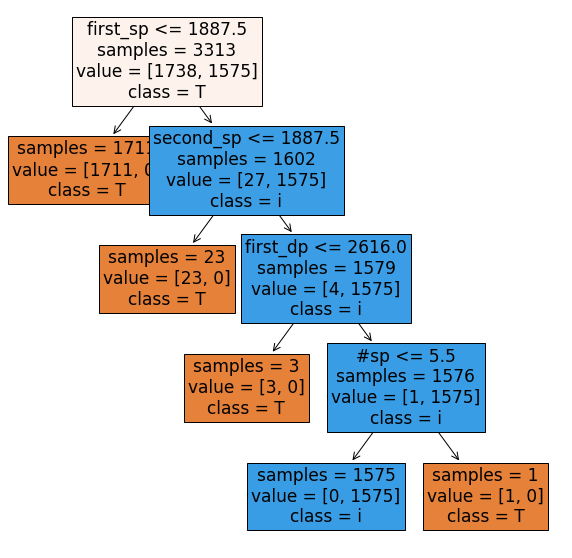

In [128]:
fig, ax = plt.subplots(figsize = (10,10))

print(colored(f'Profundidad del árbol: {model.get_depth()}', attrs=['bold']))
print(colored(f'Número de nodos terminales: {model.get_n_leaves()}', attrs=['bold']))


plot_tree(
    decision_tree = model,
    feature_names = X_train.columns.tolist(),
    class_names   = 'Tipo de trafico minero',
    filled        = True,
    impurity      = False,
    fontsize      = 17,
    ax            = ax
)

In [129]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [130]:
len(y_pred[y_pred == 0])

763

In [131]:
len(y_pred[y_pred == 1])

657

# Métricas y matriz de confusión

([<matplotlib.axis.YTick at 0x2665e6e8550>,
 <a list of 2 Text yticklabel objects>)

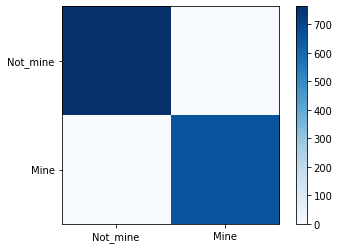

In [132]:
churm = metrics.confusion_matrix(y_test, y_pred)
plt.imshow(churm, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not_mine','Mine'])
plt.yticks(tick_marks, ['Not_mine','Mine'])

In [133]:
pd.DataFrame(churm)

,0,1
0,763,0
1,0,657


In [134]:
print("Exactitud: ", metrics.accuracy_score(y_test, y_pred))
print("Kappa: ", metrics.cohen_kappa_score(y_test, y_pred))

Exactitud:  1.0
Kappa:  1.0


In [135]:
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[1], average='macro'))

VP = np.sum(churm[1:2,1:2])
FN = np.sum(churm[1,0:1])
specificity = VP/(VP+FN)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[1], average='macro'))

Precisión     :  1.0
Recall        :  1.0
Especificidad :  1.0
F1-score      :  1.0


In [136]:
print("Precisión     : ", metrics.precision_score(y_test, y_pred, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_test, y_pred, labels=[0], average='macro'))

VP = np.sum(churm[0:1,0:1])
FN = np.sum(churm[0,1:2])
specificity = VP/(VP+FN)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test, y_pred, labels=[0], average='macro'))

Precisión     :  1.0
Recall        :  1.0
Especificidad :  1.0
F1-score      :  1.0


In [137]:
y_pred_proba = model.predict_proba(X_test)

In [138]:
lr_probs = y_pred_proba[:,1]

In [139]:
ns_probs = [0 for _ in range(len(y_test))]

In [140]:
ns_auc = metrics.roc_auc_score(y_test, ns_probs)
ns_auc

0.5

In [141]:
lr_auc = metrics.roc_auc_score(y_test, lr_probs)
lr_auc

1.0

In [142]:
#Sumo los scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Treeb: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Treeb: ROC AUC=1.000


In [143]:
ns_fpr, ns_tpr, thresholds  = metrics.roc_curve(y_test,ns_probs)
lr_fpr, lr_tpr, thresholds = metrics.roc_curve(y_test, lr_probs)

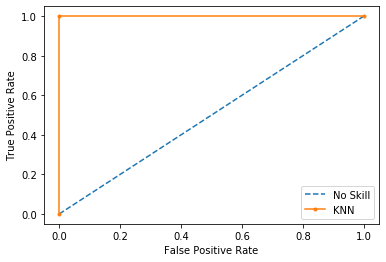

In [144]:
#Plot la roc curva para el modelo
plt.plot(ns_fpr,ns_tpr,linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Holdaunt 70% pero debo hacer una validadci{on cruzada en este conjunto de entrenamiento (Puros), de este cruz validation saldra un modelo, y lo testeo con el 30%, con este porcentaje, le saco las metricas

# Exprimento 1

In [145]:
data_N = pd.read_csv('./data_no_identificada.csv')
data_N.columns

Index(['index', 'Name', 'Netflows', 'First_Protocol', 'Second_Protocol',
       'Third_Protocol', 'p1_d', 'p2_d', 'p3_d', 'duration', 'max_d', 'min_d',
       '#packets', 'Avg_bps', 'Avg_pps', 'Avg_bpp', '#Bytes', '#sp', '#dp',
       'first_sp', 'second_sp', 'third_sp', 'first_dp', 'second_dp',
       'third_dp', 'p1_ip', 'p2_ip', 'p3_ip', 'p1_ib', 'p2_ib', 'p3_ib',
       'Type', 'Cryptocurrency'],
      dtype='object')

In [146]:
Feature_Selection =['p1_d', 'p2_d', 'min_d', '#sp', '#dp', 'first_sp', 'first_dp', 'second_sp', 'second_dp','Type']

In [147]:
temp = data_N[Feature_Selection]

In [148]:
temp = temp.dropna()

In [149]:
temp.isnull().sum()

p1_d         0
p2_d         0
min_d        0
#sp          0
#dp          0
first_sp     0
first_dp     0
second_sp    0
second_dp    0
Type         0
dtype: int64

In [150]:
y_predN = model.predict(temp.drop('Type', axis = 1))
y_predN

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [151]:
len(y_predN[y_predN == 0])

31933

In [152]:
len(y_predN[y_predN == 1])

65

In [153]:
y_tesN = temp['Type'].replace({'mine':1,'not_mine':0})

([<matplotlib.axis.YTick at 0x2665de90fd0>,
 <a list of 2 Text yticklabel objects>)

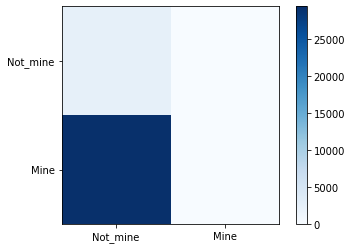

In [154]:
churm = metrics.confusion_matrix(y_tesN, y_predN)
plt.imshow(churm, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not_mine','Mine'])
plt.yticks(tick_marks, ['Not_mine','Mine'])

In [155]:
pd.DataFrame(churm)

,0,1
0,2498,0
1,29435,65


In [156]:
print("Exactitud: ", metrics.accuracy_score(y_tesN, y_predN))
print("Kappa: ", metrics.cohen_kappa_score(y_tesN, y_predN))

Exactitud:  0.08009875617226077
Kappa:  0.0003446665995957554


In [157]:
print("Precisión     : ", metrics.precision_score(y_tesN, y_predN, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y_tesN, y_predN, labels=[1], average='macro'))

VP = np.sum(churm[1:2,1:2])
FN = np.sum(churm[1,0:1])
specificity = VP/(VP+FN)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_tesN, y_predN, labels=[1], average='macro'))

Precisión     :  1.0
Recall        :  0.0022033898305084745
Especificidad :  0.0022033898305084745
F1-score      :  0.004397091155082022


In [158]:
print("Precisión     : ", metrics.precision_score(y_tesN, y_predN, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_tesN, y_predN, labels=[0], average='macro'))

VP = np.sum(churm[0:1,0:1])
FN = np.sum(churm[0,1:2])
specificity = VP/(VP+FN)
print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_tesN, y_predN, labels=[0], average='macro'))

Precisión     :  0.07822628628691322
Recall        :  1.0
Especificidad :  1.0
F1-score      :  0.14510179779849555


# Experimento 1

In [160]:
Feature_Selection = ['p1_d', 'p2_d','min_d','#sp','#dp','first_sp', 'first_dp', 'second_sp','second_dp']
X = data[Feature_Selection]
y = data['Type_mine']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7)

In [166]:
X_train_II, X_test_II, y_train_II, y_test_II = train_test_split(X_train, y_train, train_size = 0.7)

In [169]:
model_II = DecisionTreeClassifier(
    criterion='entropy', 
    max_depth=5,      
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=None,  
    max_leaf_nodes=None, 
    min_impurity_decrease=0.0, 
    class_weight=None)

In [170]:
model_II.fit(X_train_II,y_train_II)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Profundidad del árbol: 3
Número de nodos terminales: 4


[Text(186.0, 475.65000000000003, 'first_sp <= 1887.5\nsamples = 2319\nvalue = [1240, 1079]\nclass = T'),
 Text(93.0, 339.75, 'samples = 1227\nvalue = [1227, 0]\nclass = T'),
 Text(279.0, 339.75, 'second_sp <= 1887.5\nsamples = 1092\nvalue = [13, 1079]\nclass = i'),
 Text(186.0, 203.85000000000002, 'samples = 12\nvalue = [12, 0]\nclass = T'),
 Text(372.0, 203.85000000000002, 'first_dp <= 1887.5\nsamples = 1080\nvalue = [1, 1079]\nclass = i'),
 Text(279.0, 67.94999999999999, 'samples = 1\nvalue = [1, 0]\nclass = T'),
 Text(465.0, 67.94999999999999, 'samples = 1079\nvalue = [0, 1079]\nclass = i')]

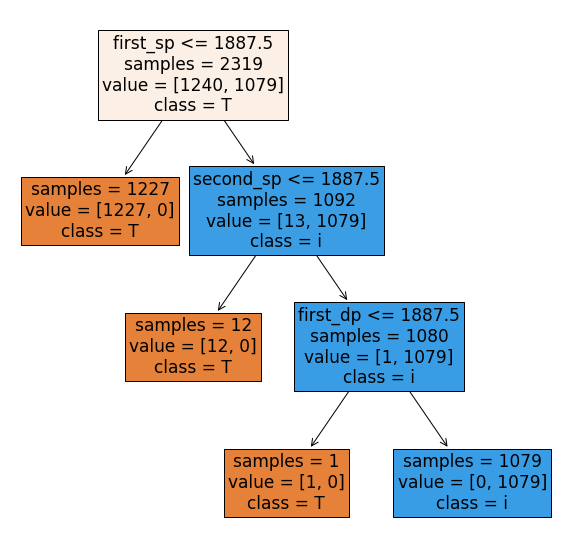

In [171]:
fig, ax = plt.subplots(figsize = (10,10))

print(colored(f'Profundidad del árbol: {model.get_depth()}', attrs=['bold']))
print(colored(f'Número de nodos terminales: {model.get_n_leaves()}', attrs=['bold']))


plot_tree(
    decision_tree = model_II,
    feature_names = X_train_II.columns.tolist(),
    class_names   = 'Tipo de trafico minero',
    filled        = True,
    impurity      = False,
    fontsize      = 17,
    ax            = ax
)

In [175]:
y_pred_II = model_II.predict(X_test_II)

# Métricas y matriz de confusión modelo II

([<matplotlib.axis.YTick at 0x2665ecce198>,
 <a list of 2 Text yticklabel objects>)

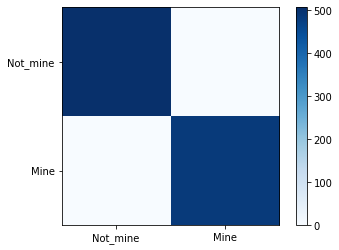

In [176]:
churm = metrics.confusion_matrix(y_test_II, y_pred_II)
plt.imshow(churm, cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Not_mine','Mine'])
plt.yticks(tick_marks, ['Not_mine','Mine'])

In [177]:
pd.DataFrame(churm)

,0,1
0,507,0
1,0,487


In [179]:
print("Exactitud: ", metrics.accuracy_score(y_test_II, y_pred_II))
print("Kappa: ", metrics.cohen_kappa_score(y_test_II, y_pred_II))

Exactitud:  1.0
Kappa:  1.0


In [180]:
print("Precisión     : ", metrics.precision_score(y_test_II, y_pred_II, labels=[1], average='macro'))
print("Recall        : ", metrics.recall_score(y_test_II, y_pred_II, labels=[1], average='macro'))

VP = np.sum(churm[1:2,1:2])
FN = np.sum(churm[1,0:1])
specificity = VP/(VP+FN)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test_II, y_pred_II, labels=[1], average='macro'))

Precisión     :  1.0
Recall        :  1.0
Especificidad :  1.0
F1-score      :  1.0


In [181]:
print("Precisión     : ", metrics.precision_score(y_test_II, y_pred_II, labels=[0], average='macro'))
print("Recall        : ", metrics.recall_score(y_test_II, y_pred_II, labels=[0], average='macro'))

VP = np.sum(churm[0:1,0:1])
FN = np.sum(churm[0,1:2])
specificity = VP/(VP+FN)

print("Especificidad : ", specificity)

print("F1-score      : ", metrics.f1_score(y_test_II, y_pred_II, labels=[0], average='macro'))

Precisión     :  1.0
Recall        :  1.0
Especificidad :  1.0
F1-score      :  1.0


In [184]:
scores = cross_validate()

TypeError: cross_validate() missing 2 required positional arguments: 'estimator' and 'X'